In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import scipy

%pylab inline
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

Populating the interactive namespace from numpy and matplotlib


# Посмотрим на датасет

In [2]:
print(newsgroups_train['DESCR'])

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

In [3]:
newsgroups_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [4]:
len(newsgroups_train['data'])

11314

In [5]:
len(newsgroups_train['target_names'])

20

# Разбиение датасета

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=100)
cv.fit(newsgroups_train['data'])

CountVectorizer(max_features=100)

In [7]:
X_train = cv.transform(newsgroups_train['data'])
X_test = cv.transform(newsgroups_test['data'])

y_train = newsgroups_train['target']
y_test = newsgroups_test['target']

In [8]:
cv.get_feature_names()

['about',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 'article',
 'as',
 'at',
 'ax',
 'be',
 'because',
 'been',
 'but',
 'by',
 'ca',
 'can',
 'com',
 'could',
 'do',
 'does',
 'don',
 'edu',
 'even',
 'for',
 'from',
 'get',
 'good',
 'had',
 'has',
 'have',
 'he',
 'his',
 'host',
 'how',
 'if',
 'in',
 'is',
 'it',
 'just',
 'know',
 'like',
 'lines',
 'max',
 'may',
 'me',
 'more',
 'my',
 'new',
 'nntp',
 'no',
 'not',
 'of',
 'on',
 'one',
 'only',
 'or',
 'organization',
 'other',
 'out',
 'people',
 'posting',
 're',
 'should',
 'so',
 'some',
 'subject',
 'than',
 'that',
 'the',
 'their',
 'them',
 'then',
 'there',
 'these',
 'they',
 'think',
 'this',
 'time',
 'to',
 'university',
 'up',
 'us',
 'use',
 'was',
 'we',
 'well',
 'were',
 'what',
 'when',
 'which',
 'who',
 'will',
 'with',
 'would',
 'writes',
 'you',
 'your']

In [9]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

In [10]:
train_mask = (y_train <= 1)
test_mask = (y_test <= 1)

X_train = X_train[train_mask]
X_test = X_test[test_mask]

y_train = y_train[train_mask]
y_test = y_test[test_mask]

In [11]:
np.sum(y_test)

389

In [12]:
X_test

<708x100 sparse matrix of type '<class 'numpy.int64'>'
	with 28551 stored elements in Compressed Sparse Row format>

In [13]:
print(X_train.todense())

[[2 0 0 ... 1 1 0]
 [0 1 0 ... 1 2 0]
 [1 5 0 ... 1 2 1]
 ...
 [0 2 1 ... 0 1 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 1 1 0]]


# Библиотечная логистическая регрессия`

In [14]:
%%time
clf = LogisticRegression(random_state=134).fit(X_train, y_train)

C:\Users\ekolodezeva\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Wall time: 56 ms


In [15]:
clf.coef_

array([[ 0.21496871, -0.11384424,  0.7311534 ,  0.48705665, -0.42260385,
         0.094515  ,  0.59822667,  0.00846995,  0.15964525, -0.34476092,
         0.45314366,  0.54473344, -0.12165382, -0.23598926, -0.20773231,
         0.30986171, -0.37451187,  1.42639949,  0.11658298, -0.11691015,
         0.11772231, -0.14345485,  0.2839943 , -0.11334614, -0.41722941,
        -0.32348899,  0.42738372,  0.12883422,  0.84222505,  0.13201334,
        -0.00511945,  0.23562563, -0.01588055, -0.78760842, -1.11139986,
         0.09696209,  0.11426275, -0.07952529,  0.06412146, -0.08910738,
        -0.05074342,  0.47139569,  0.02094068,  0.43661826, -0.70061604,
         0.09806651,  0.26838398,  0.33765619, -0.14253297, -0.26548601,
         0.05261228,  0.03483652, -0.32231762, -0.03945235, -0.22840162,
         0.12764263, -0.44253104,  0.65816734, -0.25507359,  0.73324838,
        -0.12170561,  0.53595044, -1.61622365,  0.27528772, -1.32360436,
         0.08397621, -0.04200025, -0.03223417,  0.7

In [16]:
[(k,v) for k, v in sorted(cv.vocabulary_.items(), key=lambda item: item[1])]

[('about', 0),
 ('all', 1),
 ('also', 2),
 ('am', 3),
 ('an', 4),
 ('and', 5),
 ('any', 6),
 ('are', 7),
 ('article', 8),
 ('as', 9),
 ('at', 10),
 ('ax', 11),
 ('be', 12),
 ('because', 13),
 ('been', 14),
 ('but', 15),
 ('by', 16),
 ('ca', 17),
 ('can', 18),
 ('com', 19),
 ('could', 20),
 ('do', 21),
 ('does', 22),
 ('don', 23),
 ('edu', 24),
 ('even', 25),
 ('for', 26),
 ('from', 27),
 ('get', 28),
 ('good', 29),
 ('had', 30),
 ('has', 31),
 ('have', 32),
 ('he', 33),
 ('his', 34),
 ('host', 35),
 ('how', 36),
 ('if', 37),
 ('in', 38),
 ('is', 39),
 ('it', 40),
 ('just', 41),
 ('know', 42),
 ('like', 43),
 ('lines', 44),
 ('max', 45),
 ('may', 46),
 ('me', 47),
 ('more', 48),
 ('my', 49),
 ('new', 50),
 ('nntp', 51),
 ('no', 52),
 ('not', 53),
 ('of', 54),
 ('on', 55),
 ('one', 56),
 ('only', 57),
 ('or', 58),
 ('organization', 59),
 ('other', 60),
 ('out', 61),
 ('people', 62),
 ('posting', 63),
 ('re', 64),
 ('should', 65),
 ('so', 66),
 ('some', 67),
 ('subject', 68),
 ('than', 69

In [17]:
names = [k for k, v in sorted(cv.vocabulary_.items(), key=lambda item: item[1])]
coef = clf.coef_.ravel()

In [18]:
df = pd.DataFrame(np.array([coef, names]).T, columns=['coef', 'names'])
df.sort_values('coef')[-10:]

,coef,names
6,0.5982266729787513,any
57,0.658167343324152,only
74,0.7261400937104695,then
2,0.7311534009073474,also
59,0.7332483838771474,organization
68,0.7563378689044453,subject
28,0.8422250509326602,get
85,0.9613877498621203,use
82,0.9725277835491077,university
17,1.4263994887554874,ca


In [19]:
# ! pip3 install eli5

In [20]:
import eli5
eli5.explain_weights(clf, feature_names=names)

C:\Users\ekolodezeva\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\ekolodezeva\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight?,Feature
+1.595,<BIAS>
+1.426,ca
+0.973,university
+0.961,use
+0.842,get
+0.756,subject
+0.733,organization
+0.731,also
+0.726,then
+0.658,only


# Ручная реализация логистической регрессии 

In [21]:
# Будем использовать формулы из лекции для классов с метками -1 и 1. Для этого трансформируем данные

In [22]:
y_train[y_train == 0] = -1
y_test[y_test == 0] = -1

In [23]:
def sigma(w, x):
    return 1 / (1 + np.exp(-x.dot(w)))

def L(w, X, y):
    N = w.shape[0]
#     import pdb; pdb.set_trace()
    return 1 / N * np.sum(np.log(1 + np.exp(-y * X.dot(w))))

def model(w, X):
    return np.where(sigma(w, X) > 0.5, 1, -1)

def accuracy(w, X, y):
    return sum(model(w, X) == y) / y.shape[0]

# Полный градиент dL/dw = sum (exp(*)) / sum(1 + exp(*)) * X^T * y
def dL(w, X, y):
    N = w.shape[0]
    return np.array(-1 / N * np.sum(X.T.multiply(y).
                    multiply(1 /(1 + np.exp(-y * X.dot(w)))).multiply(np.exp(-y * X.dot(w))), 
                    axis=1)).ravel()

In [24]:
# Начинаем с нулевых весов
w = np.zeros(X_train.shape[1]) / 1000
MAX_ITERS = 1000
accuracy_train = np.zeros(MAX_ITERS)
accuracy_test = np.zeros(MAX_ITERS)
lamda = 0.0001
for i in range(MAX_ITERS):
    w_next = w - lamda * dL(w, X_train, y_train)
    accuracy_train[i] = accuracy(w_next, X_train, y_train)
    accuracy_test[i] = accuracy(w_next, X_test, y_test)
    w = w_next
    assert not np.any(w == np.nan)

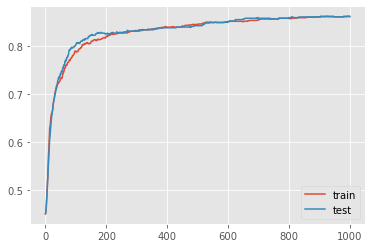

In [25]:
plt.plot(range(MAX_ITERS), accuracy_train, label='train')
plt.plot(range(MAX_ITERS), accuracy_test, label='test')
plt.legend()

In [26]:
print('Значение accuracy на обучающей выборке: ', accuracy(w, X_train, y_train))
print('Значение accuracy на тестовой выборке: ', accuracy(w, X_test, y_test))

Значение accuracy на обучающей выборке:  0.8618421052631579
Значение accuracy на тестовой выборке:  0.8629943502824858
